In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
# ignores FutureWarnings. Helps in readbility.
# Since we are using a conda envrionment with defined package versions we are not concerned with changes in a package's future releases.


In [3]:
datadir = "data"
savedir = "plots"

if not os.path.exists(savedir):
    os.mkdir(savedir)

In [4]:
sns.set(style="whitegrid", font_scale=1.2)

## 2A

In [5]:
df_music = pd.read_table(os.path.join(datadir, "MuSiC_ica.txt"), index_col=0).T
df_music = df_music[["rmse_orig", "rmse_ica"]]

In [6]:
df_music.rename(columns={"rmse_orig": "MuSiC",
                         "rmse_ica": "MuSiC (ICA)"}, inplace=True)

In [7]:
df_music["dataset"] = df_music.index.tolist() 

In [8]:
df_music = df_music.melt(id_vars=["dataset"])
df_music.rename(columns={"variable": "Method", "value": "rmse"},
         inplace=True)

In [9]:
df_music

,dataset,Method,rmse
0,SDY67,MuSiC,0.294505
1,Monaco I,MuSiC,0.236327
2,Monaco II,MuSiC,0.233858
3,GSE65133,MuSiC,0.242204
4,GSE107572,MuSiC,0.215689
5,GSE120502,MuSiC,0.337709
6,SDY67,MuSiC (ICA),0.173000
7,Monaco I,MuSiC (ICA),0.113000
8,Monaco II,MuSiC (ICA),0.210000
9,GSE65133,MuSiC (ICA),0.200000


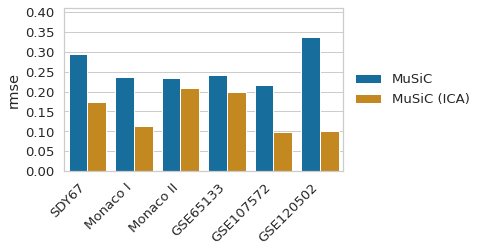

In [10]:
plt.figure(figsize=(5,3))
sns.barplot(data=df_music, hue="Method", x="dataset", y="rmse",
           palette="colorblind", ci=None)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# plt.ylabel(r"$r$")
plt.ylabel("rmse")
plt.ylim(0,0.41)
plt.yticks(np.arange(0,0.41,0.05))
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(savedir, "S2A_average_rmse_music.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(savedir, "S2A_average_rmse_music.png"), bbox_inches="tight", dpi=300)

## 2B

In [11]:
df_music = pd.read_table(os.path.join(datadir, "MuSiC_ica.txt"), index_col=0).T
df_music = df_music[["r_orig", "r_ica"]]

In [12]:
df_music.rename(columns={"r_orig": "MuSiC",
                         "r_ica": "MuSiC (ICA)"}, inplace=True)

In [13]:
df_music["dataset"] = df_music.index.tolist() 

In [14]:
df_music = df_music.melt(id_vars=["dataset"])
df_music.rename(columns={"variable": "Method", "value": "r"},
         inplace=True)

In [15]:
df_music

,dataset,Method,r
0,SDY67,MuSiC,0.168183
1,Monaco I,MuSiC,0.537191
2,Monaco II,MuSiC,0.472584
3,GSE65133,MuSiC,0.293400
4,GSE107572,MuSiC,0.505512
5,GSE120502,MuSiC,0.129509
6,SDY67,MuSiC (ICA),0.557000
7,Monaco I,MuSiC (ICA),0.684000
8,Monaco II,MuSiC (ICA),0.592000
9,GSE65133,MuSiC (ICA),0.554000


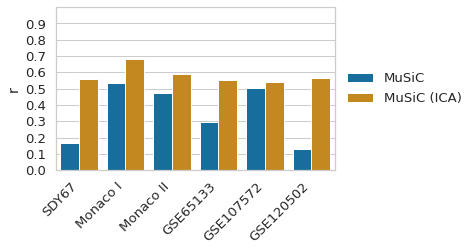

In [16]:
plt.figure(figsize=(5,3))
sns.barplot(data=df_music, hue="Method", x="dataset", y="r",
           palette="colorblind", ci=None)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
# plt.ylabel(r"$r$")
plt.ylabel("r")
plt.ylim(0,1)
plt.yticks(np.arange(0,1,0.1))
plt.xlabel("")
plt.xticks(rotation=45, ha="right")
plt.savefig(os.path.join(savedir, "S2B_average_r_music.pdf"), bbox_inches="tight")
plt.savefig(os.path.join(savedir, "S2B_average_r_music.png"), bbox_inches="tight", dpi=300)